**Key Performance Indicators (KPIs): Data Analysis based on Data from European Centre for Disease Prevention and Control**


 In this scribt I loaded and modified COVID-19 data using the pandas library, renaming columns for clarity and removing unnecessary ones. Exploring the dataset revealed key statistics and identified the number of represented countries. Additionally, I analyzed and visualized total deaths by country, creating an interactive horizontal bar chart with Plotly Express. Further, I examined monthly deaths by country, highlighting the month and country with the highest death count. The results were printed, and a Seaborn bar plot depicting monthly deaths by country was created and saved as an image. This script provides a comprehensive analysis and visualization of COVID-19 data, shedding light on both cumulative and monthly death patterns across countries.

In [2]:
import pandas as pd
import seaborn as sns
import plotly.io as pio
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 


#The file path along with the variable.
file_path = "Data/data.xlsx"
work_sheet = "Sheet1"

#Reads the file into a dataframe
df = pd.read_excel(file_path, sheet_name= work_sheet)
df.head()

,dateRep,year,month,day,cases,deaths,countriesAndTerritories,geoId,popData2020,countryterritoryCode,continentExp
0,23/10/2022,2022,10,23,3557.0,0.0,Austria,AT,8901064,AUT,Europe
1,22/10/2022,2022,10,22,5494.0,4.0,Austria,AT,8901064,AUT,Europe
2,21/10/2022,2022,10,21,7776.0,4.0,Austria,AT,8901064,AUT,Europe
3,20/10/2022,2022,10,20,8221.0,6.0,Austria,AT,8901064,AUT,Europe
4,19/10/2022,2022,10,19,10007.0,8.0,Austria,AT,8901064,AUT,Europe


In [3]:
"""Modifying and renaming columns for easier use"""

column_name_mapping = {
    "dateRep": "ReportDate",
    "year": "Year",
    "month": "Month",
    "day": "Day",
    "cases": "Cases",
    "deaths": "Deaths",
    "countriesAndTerritories": "Country",
    "geoId": "GeoID",
    "popData2020": "Population2020",
    "countryterritoryCode": "CountryCode",
    "continentExp": "Continent"
}

# Use the rename function to change the names of the columns.
df.rename(columns=column_name_mapping, inplace=True)

In [4]:
"""Removing columns I don't need for easier use"""
columns_to_remove = ["GeoID", "CountryCode", "ReportDate"]
df = df.drop(columns=columns_to_remove)
df.head()

,Year,Month,Day,Cases,Deaths,Country,Population2020,Continent
0,2022,10,23,3557.0,0.0,Austria,8901064,Europe
1,2022,10,22,5494.0,4.0,Austria,8901064,Europe
2,2022,10,21,7776.0,4.0,Austria,8901064,Europe
3,2022,10,20,8221.0,6.0,Austria,8901064,Europe
4,2022,10,19,10007.0,8.0,Austria,8901064,Europe


Data analysis: Loading data file and starting to process the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28729 entries, 0 to 28728
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            28729 non-null  int64  
 1   Month           28729 non-null  int64  
 2   Day             28729 non-null  int64  
 3   Cases           28636 non-null  float64
 4   Deaths          28437 non-null  float64
 5   Country         28729 non-null  object 
 6   Population2020  28729 non-null  int64  
 7   Continent       28729 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 1.8+ MB


In [6]:
len(df)

28729

In [7]:
df.describe()

,Year,Month,Day,Cases,Deaths,Population2020
count,28729.000000,28729.000000,28729.000000,28636.000000,28437.000000,2.872900e+04
mean,2020.967559,6.431446,15.681855,6088.425129,40.866160,1.534803e+07
std,0.789220,3.223586,8.778566,21455.994469,128.729388,2.142396e+07
min,2020.000000,1.000000,1.000000,-348846.000000,-217.000000,3.874700e+04
25%,2020.000000,4.000000,8.000000,111.000000,0.000000,2.095861e+06
50%,2021.000000,6.000000,16.000000,705.000000,5.000000,6.951482e+06
75%,2022.000000,9.000000,23.000000,3483.250000,31.000000,1.152244e+07
max,2022.000000,12.000000,31.000000,501635.000000,13743.000000,8.316671e+07


In [8]:
df["Year"].unique()

array([2022, 2021, 2020], dtype=int64)

How many countries are represented in the dataset representing Europe?

In [9]:
countries = len(df["Country"].unique())
print(f"The number of countries represented in the dataset is: {countries}")

# The names of all the countries
df["Country"].unique()

The number of countries represented in the dataset is: 30


array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
       'Spain', 'Sweden'], dtype=object)

What is the total population in this dataset?

In [10]:
# Calculate the sum of unique population values
Population = df["Population2020"].unique().sum()
print(f"The total population of this dataset is: {Population:,}")


The total population of this dataset is: 453,090,377


**- A) KPI: "What is the ranking of countries based on the total number of deaths in the provided data, and which country has the highest and lowest number of deaths?**

In [11]:
""""This code groups the data by country and calculates the total number of deaths for each country.
The results are displayed in a DataFrame, which is then sorted in descending order based on the
 number of deaths"""

#  Group by country and sum the number of deaths.
deaths_by_country = df.groupby("Country")["Deaths"].sum()

#Resetting the index for deaths_by_country DataFrame.
deaths_by_country = deaths_by_country.reset_index()

#Sort the DataFrame by the number of deaths in descending order (most at the top)
deaths_by_country = deaths_by_country.sort_values(by="Deaths", ascending=False)

# Show result
print(deaths_by_country)


          Country    Deaths
15          Italy  178633.0
9          France  156509.0
10        Germany  152753.0
23         Poland  118050.0
28          Spain  114110.0
25        Romania   67179.0
12        Hungary   47938.0
5         Czechia   41524.0
2        Bulgaria   37790.0
11         Greece   33574.0
1         Belgium   32883.0
24       Portugal   25131.0
21    Netherlands   22771.0
0         Austria   20899.0
26       Slovakia   20511.0
29         Sweden   20407.0
3         Croatia   17085.0
18      Lithuania    9386.0
14        Ireland    8010.0
6         Denmark    7274.0
27       Slovenia    6875.0
8         Finland    6407.0
16         Latvia    6044.0
22         Norway    4187.0
7         Estonia    2739.0
4          Cyprus    1191.0
19     Luxembourg    1144.0
20          Malta     808.0
13        Iceland     213.0
17  Liechtenstein      86.0


In [23]:
"""Create a horizontal bar chart using Plotly Express
 to visualize the total number of deaths per country"""
 
 #Generate a horizontal bar plot using Plotly Express
fig = px.bar(deaths_by_country, x="Deaths", y="Country", orientation="h",
             title="Totalt antal dödsfall per land",
             color="Deaths",
             color_continuous_scale="Viridis") 

# Save the plot as an image            
fig.write_html("Visualiseringar/4A.Totalt antal dödsfall per land.html")

# Display the plot
fig.show()

 **conclusion**
 
 I observe that Italy has the highest total number of deaths with 178,633, followed by France with 156,509, and Germany with 152,753. There is a significant variation in the number of deaths among different countries, where some, like Poland, Spain, Romania, and Hungary, report high numbers of deaths. On the other hand, some countries, such as Luxembourg, Malta, and Iceland, have considerably lower death tolls, indicating a potential variation in the impact of the pandemic.

**- B) KPI: How does the monthly distribution of deaths vary over the provided data?**

In [17]:
"""The code transforms date columns and calculates monthly death and case statistics.
It identifies the month with the highest deaths, prints the results, 
including the country and death count for that month."""

df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])

# Group by month and calculate the total number of deaths per month
monthly_stats = df.groupby(["Year", "Month", "Country"]).agg({"Deaths": "sum", "Cases": "sum"})

# Find the month with the highest number of deaths
max_deaths_month = monthly_stats["Deaths"].idxmax()

monthly_stats = monthly_stats.sort_values(by="Deaths", ascending=False)

# The number of deaths during the month with the highest number of deaths
max_deaths_count = monthly_stats.loc[max_deaths_month, "Deaths"]


# Print the results
print("Which month, year, and country had the highest number of deaths?:", max_deaths_month)
print("Number of deaths during that month:", max_deaths_count)
print(monthly_stats)


Which month, year, and country had the highest number of deaths?: (2020, 12, 'Germany')
Number of deaths during that month: 26080.0
                     Deaths     Cases
Year Month Country                   
2020 12    Germany  26080.0  678821.0
     4     France   20840.0   77453.0
2021 1     Germany  19501.0  467162.0
2020 12    Italy    18583.0  505612.0
     11    Italy    16958.0  922124.0
...                     ...       ...
           Greece       0.0   66020.0
     12    Greece       0.0   33579.0
2021 1     Greece       0.0   18107.0
           Iceland      0.0     246.0
2020 1     Czechia      0.0       0.0

[985 rows x 2 columns]


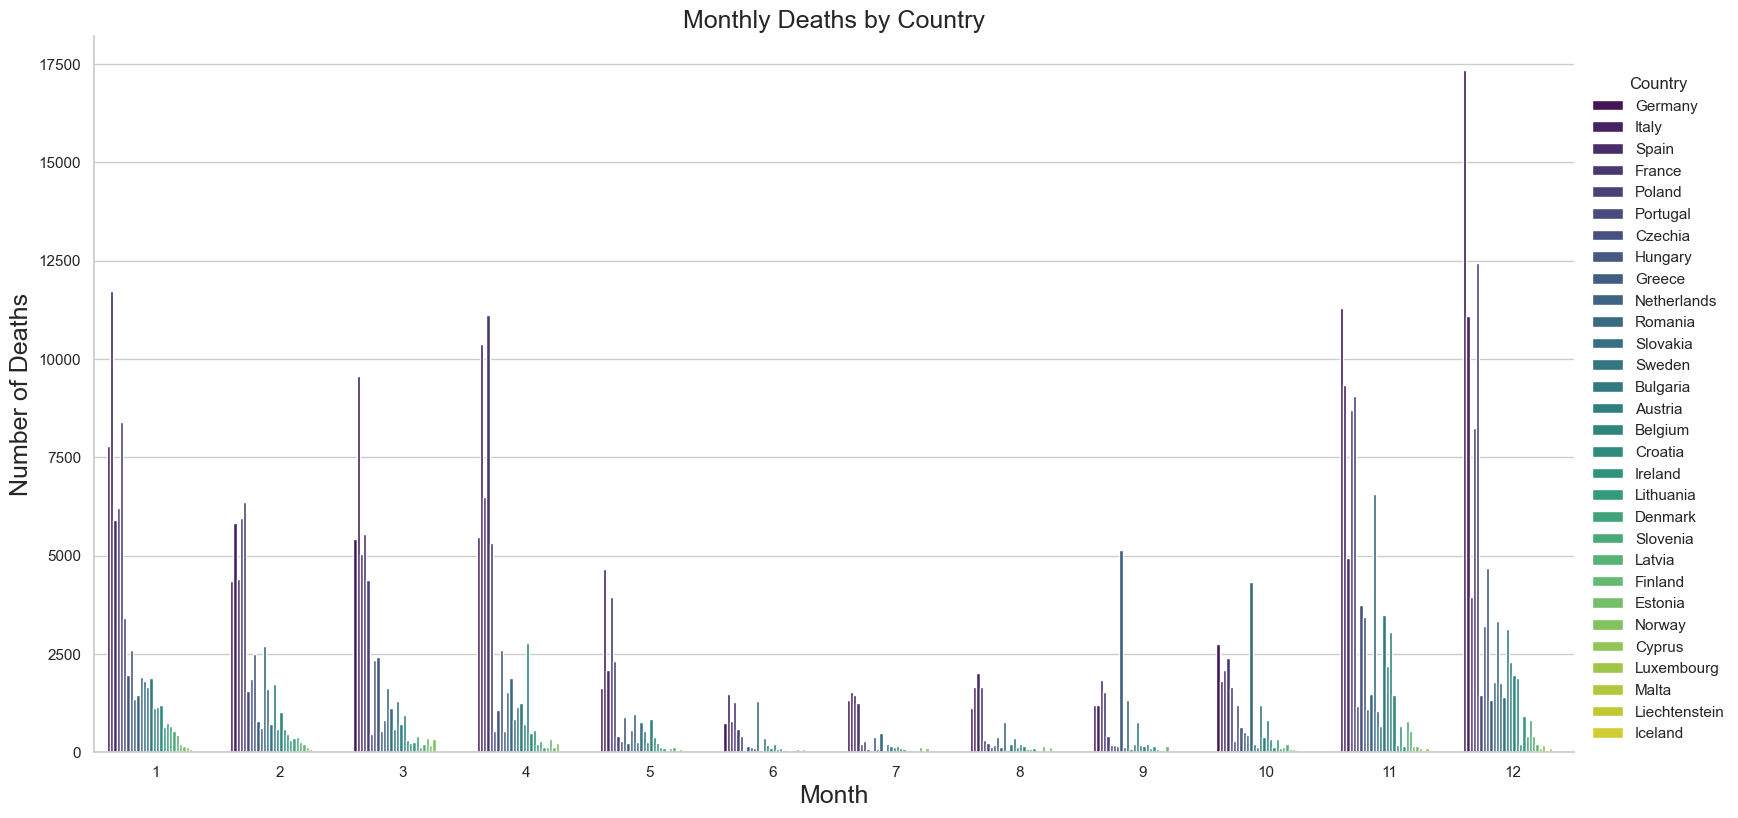

In [22]:
"""creating a bar plot using Seaborn to illustrate monthly death statistics categorized by country."""


# Create a bar plot using Seaborn to visualize monthly deaths with hue as Country
sns.catplot(x="Month", y="Deaths", hue="Country", data=monthly_stats, kind="bar", palette="viridis", height=8, aspect=2, errorbar=None, legend="brief")

# Customize plot aesthetics
sns.set(style="whitegrid") 
plt.title("Monthly Deaths by Country", fontsize=18)
plt.xlabel("Month", fontsize=18)
plt.ylabel("Number of Deaths", fontsize=18)

# Save the plot as an image
plt.savefig("Visualiseringar/4B_Monthly_Death_by_Country.png",bbox_inches="tight")

# Display the plot
plt.show()


**Conclusion**


Based on the data, the month with the highest number of deaths is December 2020 in Germany, totaling 26,080 deaths. There are variations in the number of deaths and cases across different months and years, suggesting dynamic patterns over time. Additionally, other countries like France and Italy also experienced significant death tolls. The dataset also includes instances of zero values, possibly indicating either underreporting or genuinely no deaths during certain periods. Overall, the data highlights the importance of temporal analysis and cross-country comparisons to gain insights into the COVID-19 impact on mortality.